In [85]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## Zadanie 2.
Zapoznaj się z trzema modelami mutacji pokazanymi w notebooku.

a) Dla każdego modelu mutacji, policz ile osobników po mutacji było lepszych od oryginalnego osobnika. Powtórz obliczenia kilkukrotnie i porównaj wyniki (ze względu na losowość algorytmu).

b) Dla każdego modelu mutacji, policz wartość funkcji celu najlepszego osobnika po mutacji. Powtórz obliczenia kilkukrotnie i porównaj wyniki (ze względu na losowość algorytmu).

c) Obliczenia z poprzednich punktów powtórz dla innych funkcji celu.

d) Gdzie i w jakim celu używany jest rozkład Cholesky'ego macierzy kowariancji?

e) Dla każdego modelu mutacji, narysuj elipsę odpowiadającą obszarowi 95% prawdopodobieństwa (tzn. zaznacz obszar, w którym z prawdopodobieństwem 95% znajdą się zmutowane osobniki). Policz długości osi głównych tych elips.

In [3]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [4]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [5]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

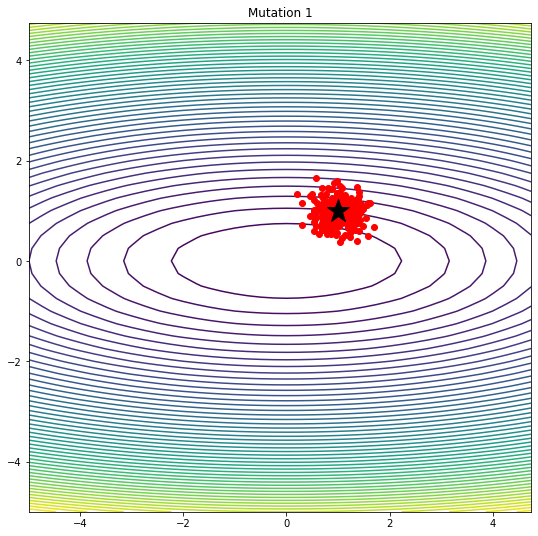

In [6]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [7]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

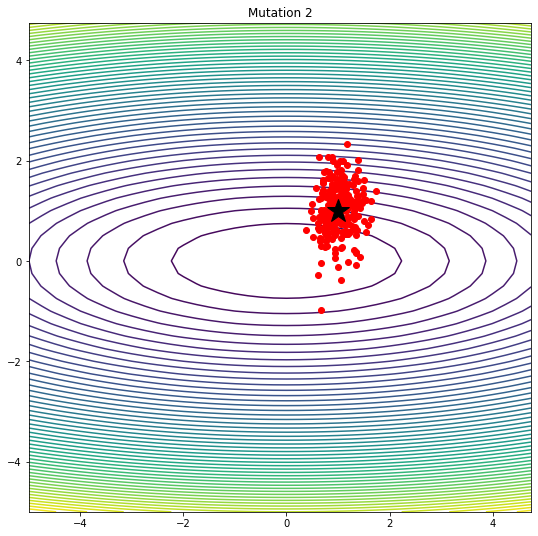

In [8]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [9]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

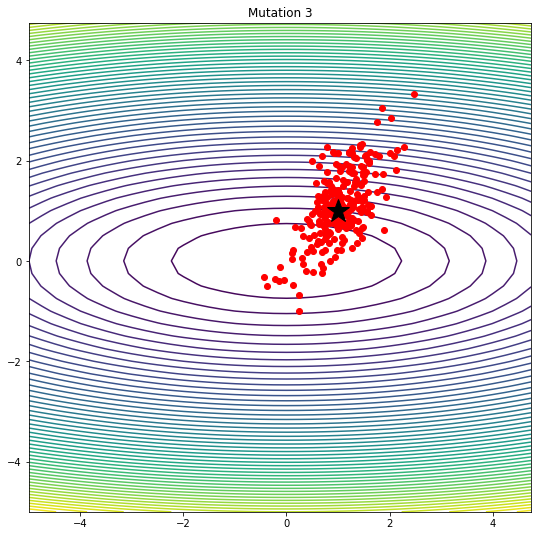

In [10]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

In [77]:
def test_muts(func, iters=100):
    def mutate(sigma):
        if type(sigma) is float or type(sigma[0]) is float:
            return original_individual + sigma + np.random.randn(N, d)
        else:
            return original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    
    
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    
    for sigma in [0.25, [0.25, 0.5], [[0.25, 0.25], [0.25, 0.5]]]:
        mutations = mutate(sigma)
        mean = 0
        best = 0
        for _ in range(iters):
            mean += (np.mean(func(mutations)>func(original_individual))) / iters
            best += np.max(func(mutations)) / iters
        print(f'{"-"*10} First mutation function')
        print(f'On average better than original: {mean:.4}4%, best on avg: {best:.4}\n')
    

In [78]:
test_muts(objective_function_F1)

---------- First mutation function
On average better than original: 0.2884%, best on avg: -0.03394

---------- First mutation function
On average better than original: 0.2164%, best on avg: -0.02853

---------- First mutation function
On average better than original: 0.4484%, best on avg: -0.00189



In [79]:
test_muts(objective_function_F1a)

---------- First mutation function
On average better than original: 0.384%, best on avg: -0.08035

---------- First mutation function
On average better than original: 0.2284%, best on avg: -0.3793

---------- First mutation function
On average better than original: 0.5364%, best on avg: -0.02251



In [80]:
test_muts(objective_function_F1b)

---------- First mutation function
On average better than original: 0.384%, best on avg: -0.3216

---------- First mutation function
On average better than original: 0.3164%, best on avg: -1.722

---------- First mutation function
On average better than original: 0.4684%, best on avg: -0.44



In [81]:
test_muts(objective_function_F1c)

---------- First mutation function
On average better than original: 0.1284%, best on avg: -0.06615

---------- First mutation function
On average better than original: 0.1124%, best on avg: -0.001251

---------- First mutation function
On average better than original: 0.44%, best on avg: -0.01954



In [142]:
def plot_elipses(mutations, og, n_std=2):
    x, y = mutations.T
    cov = np.cov(x, y)
    pearson = cov[0, 1]/(np.sqrt(cov[0, 0] * cov[1, 1])+1e-10)
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, fill=False)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(mutations[:, 0], mutations[:, 1], 'bo')
    ax.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    plt.show()

X: 1.0386674672573544, Y: 0.9597759595140903


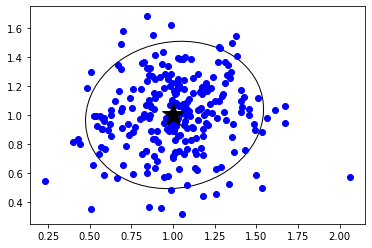

In [134]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)
plot_elipses(mutations, original_individual)

0.4782561488176097 185.78653738189203


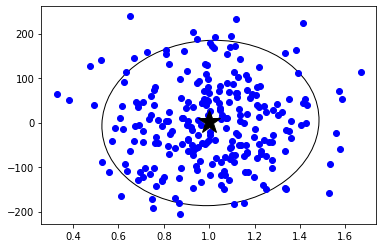

In [143]:
sigma = np.array([0.25, 90.5])
mutations = original_individual + sigma * np.random.randn(N, d)
plot_elipses(mutations, original_individual)

0.9092333282935229 1.4012238593609259


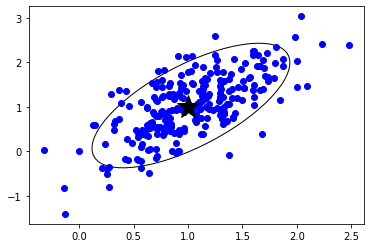

In [144]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
plot_elipses(mutations, original_individual)